<a href="https://colab.research.google.com/github/MonicaKim89/Sign_Recognition/blob/main/%5B0225%5Dyolov5_box_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 10956, done.
remote: Total 10956 (delta 0), reused 0 (delta 0), pack-reused 10956
Receiving objects: 100% (10956/10956), 11.09 MiB | 27.37 MiB/s, done.
Resolving deltas: 100% (7566/7566), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [3]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 596 kB 7.1 MB/s 
Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [4]:
#this is the model configuration we will use for our tutorial 
%cat /content/yolov5/models/yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [136]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights '/content/drive/MyDrive/box_best.pt' --img 1000 --conf 0.4 --source '/content/drive/MyDrive/20220126_153341.jpg'

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=1000, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/20220126_153341.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/box_best.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 392 layers, 46600566 parameters, 0 gradients, 114.1 GFLOPS
image 1/1 /content/drive/MyDrive/20220126_153341.jpg: 1024x832 60 boxs, Done. (0.047s)
Results saved to runs/detect/exp41
Done. (0.216s)


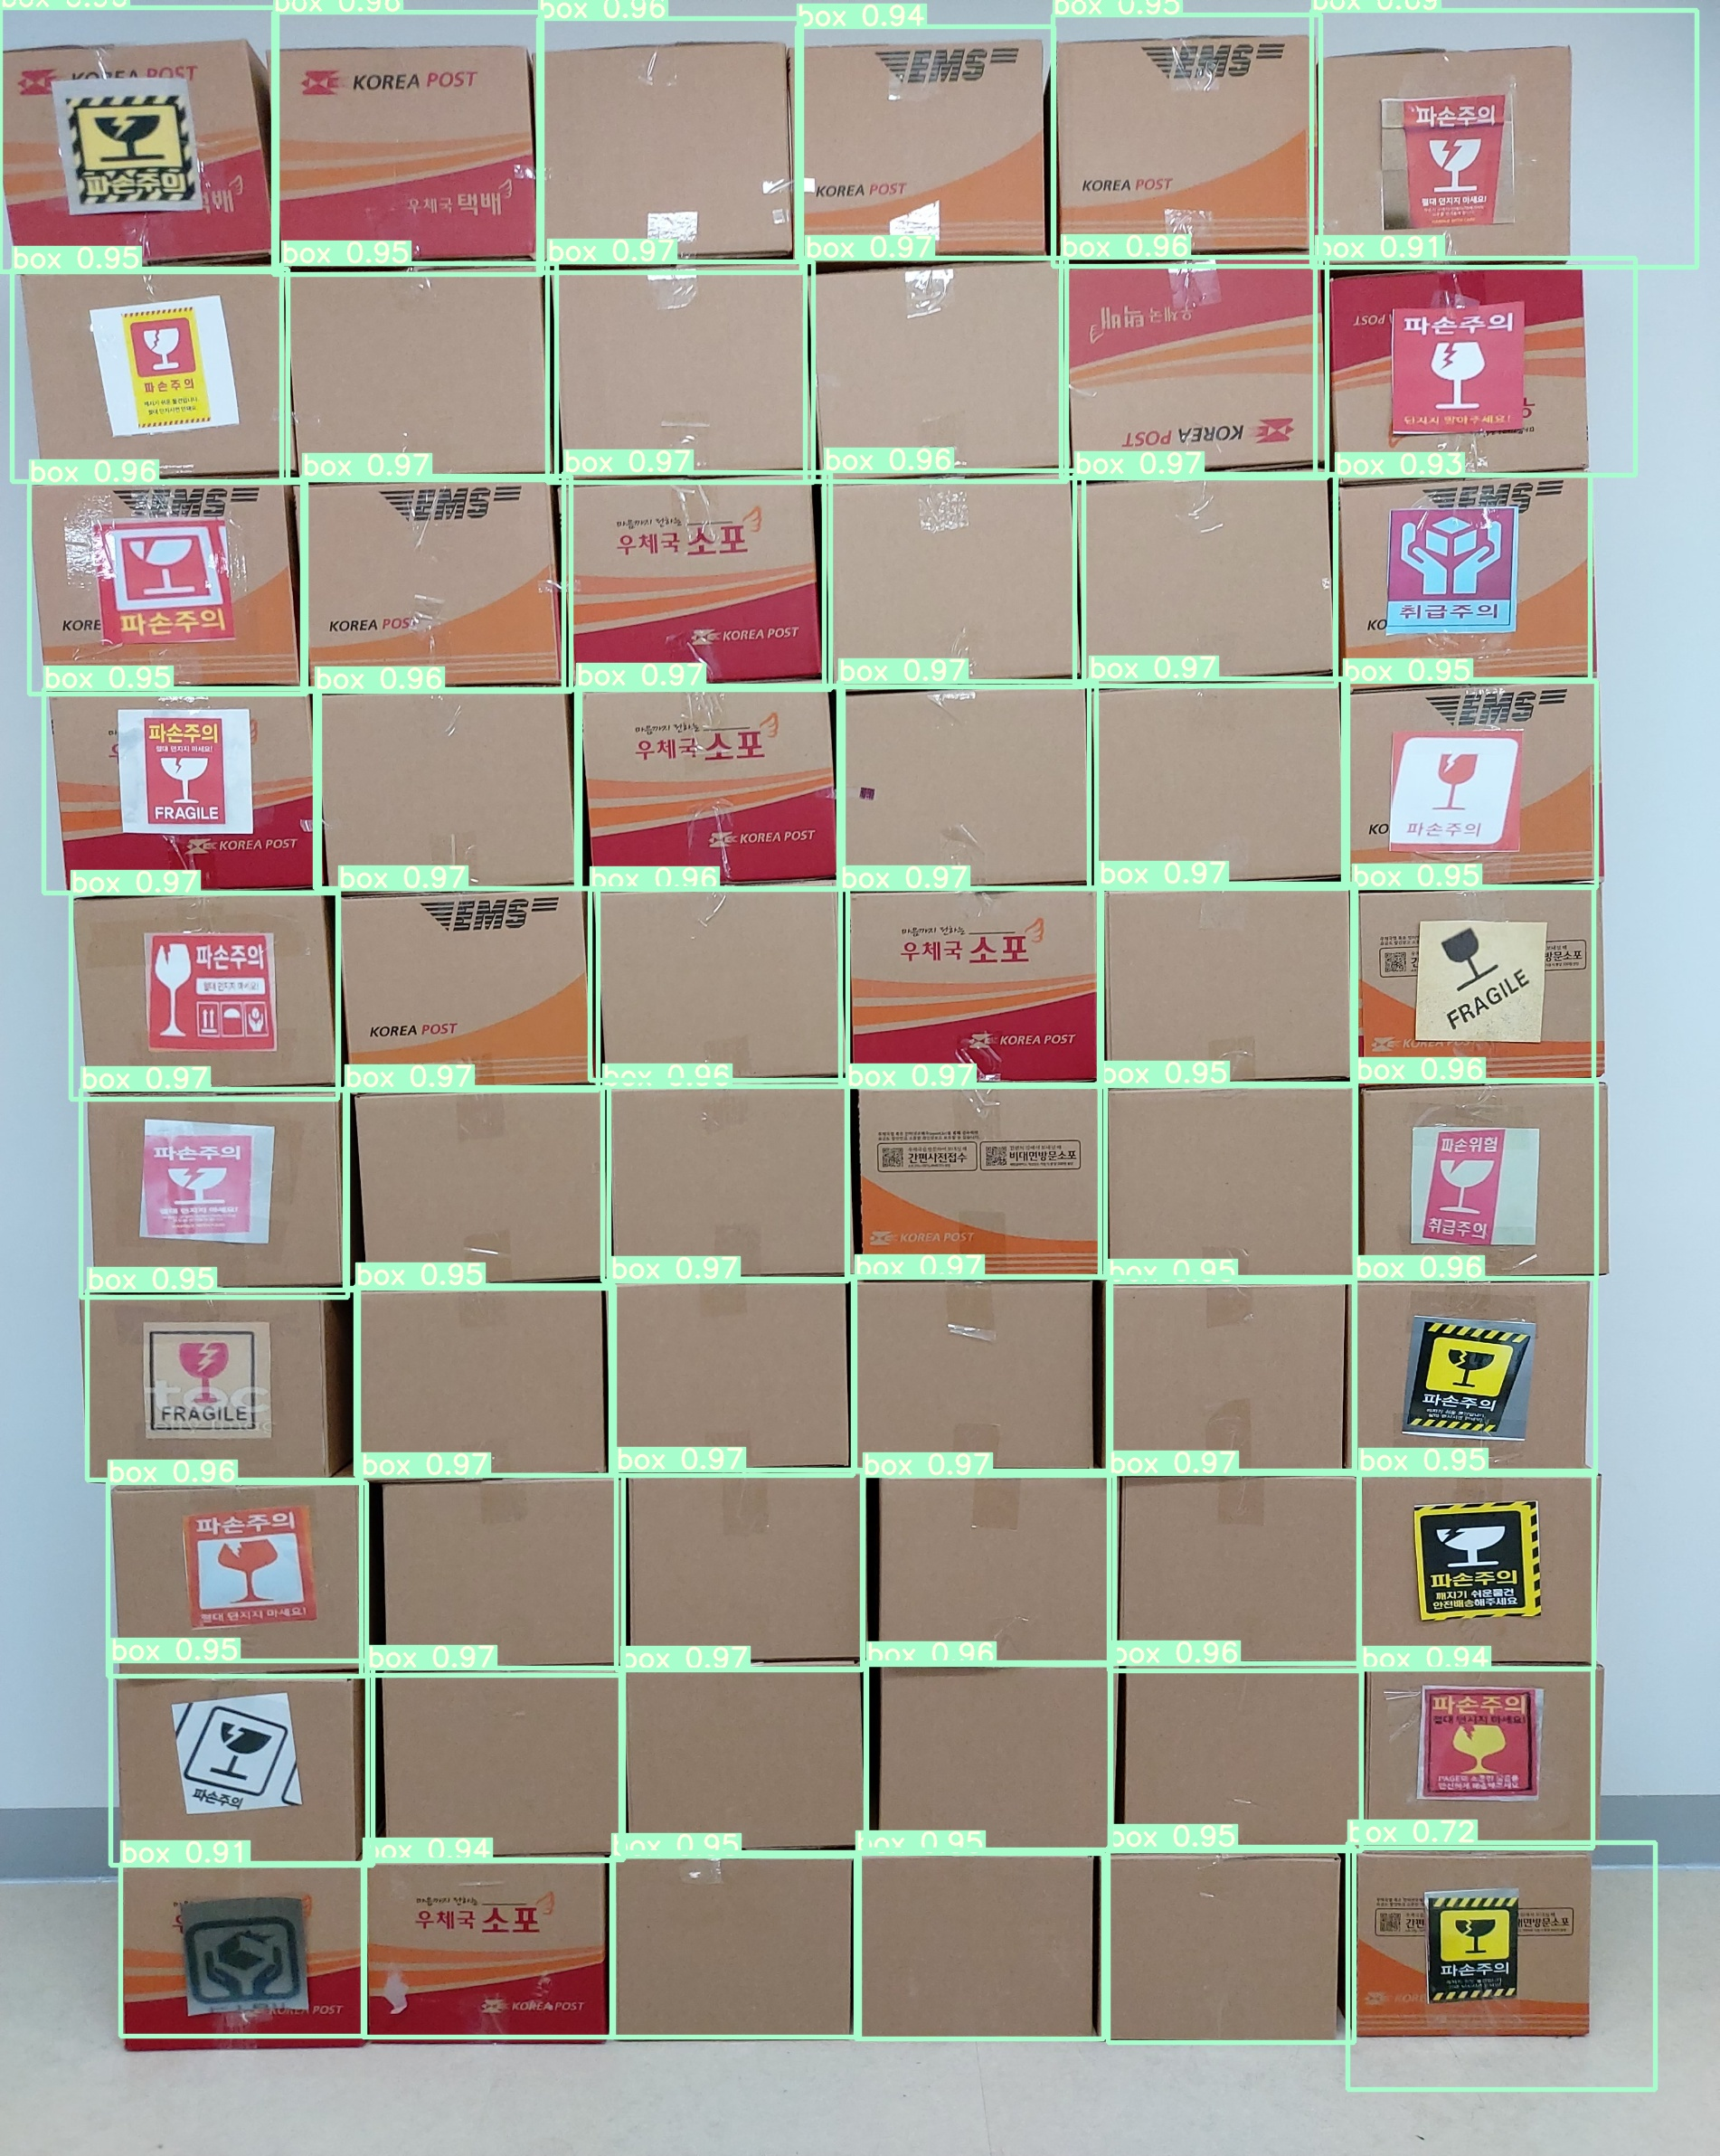

In [137]:
Image('/content/yolov5/runs/detect/exp41/20220126_153341.jpg', width = 800)

In [135]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python yolov5_detect_crop.py --weights '/content/drive/MyDrive/box_best.pt' --img 1000 --conf 0.4 --source '/content/drive/MyDrive/20220126_153341.jpg'

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=1000, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/20220126_153341.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/box_best.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 392 layers, 46600566 parameters, 0 gradients, 114.1 GFLOPS
image 1/1 /content/drive/MyDrive/20220126_153341.jpg: /content/post_resized/test/results/53_20220126_153341.jpg
/content/post_resized/test/results/15_20220126_1

### Cordinate

In [49]:
def show(img):
    #사이즈
    plt.figure(figsize = (50,30))
    #xticks/yticks - 눈금표
    plt.xticks([])
    plt.yticks([])
    #코랩에서 안돌아감 주의
    plt.imshow(img, cmap= 'gray')
    plt.show()


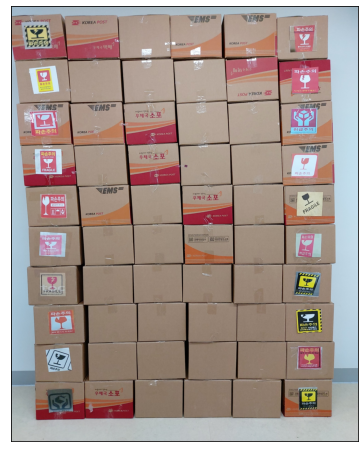

(2384, 1902, 3)

In [138]:
import cv2
import matplotlib.pylab as plt
img = cv2.imread('/content/drive/MyDrive/20220126_153341.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, dsize = (832, 1024))
show(img)
img.shape

In [ ]:
cord=[]
f = open('/content/drive/MyDrive/save_box/test.txt', 'r')
lines = f.readlines()
for line in lines:
    k = line.split('\n')[0]
    k = k.replace('(','')
    k = k.replace(')','')
    k = k.replace(',','')
    cord.append(k)
cord

In [87]:
x = int(cord[0].split(' ')[0])
y = int(cord[0].split(' ')[1])
w = int(cord[0].split(' ')[2])
h = int(cord[0].split(' ')[3])

In [104]:
import math

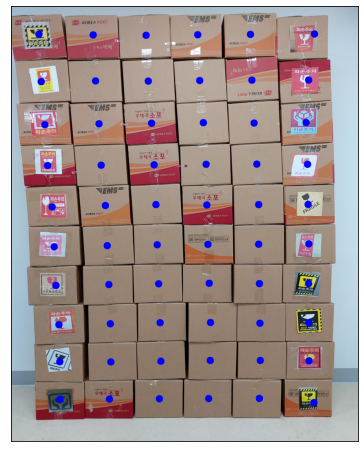

In [140]:
img_ =img.copy()
 
for i in cord:
   
    x = int(i.split(' ')[0])
    y = int(i.split(' ')[1])
    w = int(i.split(' ')[2])
    h = int(i.split(' ')[3])

    ctx= math.trunc((x+x+w)/2)
    cty = math.trunc((y+y+h)/2)
    

    # show(img[y:y+h, x:x+w])

    img_ = cv2.circle(img_, (ctx,cty), 20, (0,0,255), -1)
    # print(i)
show(img_)

    # # # show(img[y:y+h, x:x+h])

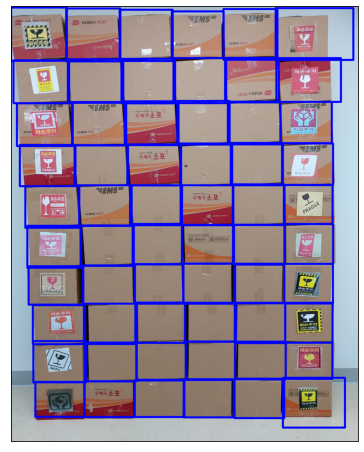

In [141]:
img_ =img.copy()
crop_list = []

for i in cord:
    # img_ =img.copy()
    x = int(i.split(' ')[0])
    y = int(i.split(' ')[1])
    w = int(i.split(' ')[2])
    h = int(i.split(' ')[3])

    ctx= math.trunc((x+x+w)/2)
    cty = math.trunc((y+y+h)/2)
    
    # print(i)
    # crop_list.append(img[y:y+h, x:x+w])

    img_ = cv2.rectangle(img_, (x,y),(x+w,y+h), (0,0,255), 10)
    
    # show(img_)
    
show(img_)

    # # # show(img[y:y+h, x:x+h])